### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


### Datasets and Files

In [4]:
ease = pd.read_csv('data/ease-of-doing-business.csv', usecols=['Country Name', 'Country Code', '2019'])
unemp = pd.read_csv('data/unemployment.csv')
GDPgrowth = pd.read_excel('data/economic-growth-indicators.xlsx', sheet_name='Growth Rate of GDP')
HDI = pd.read_excel('data/economic-growth-indicators.xlsx', sheet_name='HDI')
prod = pd.read_excel('data/economic-growth-indicators.xlsx', sheet_name='Productivity')


In [5]:
#ease_df = ease.filter(['Country Name', 'Country Code', '2019']).set_index('Country Name')
ease_df = ease.set_index('Country Name')
unemp = unemp.set_index('Country Name')


In [6]:
display(ease_df.shape,unemp.shape, GDPgrowth.shape, HDI.shape, prod.shape)

(266, 2)

(266, 66)

(24, 8)

(24, 9)

(16, 5)

In [7]:
ease_df.head()

,Country Code,2019
Country Name,,
Aruba,ABW,NaN
Africa Eastern and Southern,AFE,NaN
Afghanistan,AFG,173.0
Africa Western and Central,AFW,NaN
Angola,AGO,177.0


In [8]:
ease_df.isnull().sum().sum()

77

In [9]:
ease_df.dropna(axis=0, how='any', inplace = True) # 0 indicates the rows and inplace set to true modifies current dataframe

In [10]:
ease_df.isnull().sum().sum() 

0

In [11]:
print(ease_df)

                     Country Code   2019
Country Name                            
Afghanistan                   AFG  173.0
Angola                        AGO  177.0
Albania                       ALB   82.0
United Arab Emirates          ARE   16.0
Argentina                     ARG  126.0
...                           ...    ...
Kosovo                        XKX   57.0
Yemen, Rep.                   YEM  187.0
South Africa                  ZAF   84.0
Zambia                        ZMB   85.0
Zimbabwe                      ZWE  140.0

[189 rows x 2 columns]


In [12]:
print(ease_df['Country Code'].unique())

['AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL'
 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BRB'
 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG'
 'COL' 'COM' 'CPV' 'CRI' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA'
 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FSM' 'GAB' 'GBR'
 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GTM' 'GUY' 'HKG' 'HND'
 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LBY' 'LCA' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAR' 'MDA' 'MDG' 'MDV'
 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI'
 'MYS' 'NAM' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN'
 'PER' 'PHL' 'PLW' 'PNG' 'POL' 'PRI' 'PRT' 'PRY' 'PSE' 'QAT' 'ROU' 'RUS'
 'RWA' 'SAU' 'SDN' 'SEN' 'SGP' 'SLB' 'SLE' 'SLV' 'SMR' 'SOM' 'SRB' 'SSD'
 'STP' 'SUR' 'SVK' 'SVN' 'SWE' 'SWZ' 'SYC' 'SYR' 'T

In [13]:
ease_df.columns

Index(['Country Code', '2019'], dtype='object')

In [14]:
ease_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  189 non-null    object 
 1   2019          189 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [15]:
#ease_df["Country Name"] = ease_df["Country Name"].replace(['Brunei Darussalam', 'Lao PDR'], ['Brunei', 'Laos'])
ease_df.rename(index={'Brunei Darussalam':'Brunei','Lao PDR' : 'Laos' },inplace=True)

In [16]:
ease_df.isnull().sum().sum() 

0

In [17]:
ease_df.loc['Brunei']

Country Code     BRN
2019            66.0
Name: Brunei, dtype: object

In [18]:
ASEANCountries = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Philippines", 
                  "Singapore", "Thailand", "Vietnam"]

In [19]:
ease_df_sorted= ease_df.sort_values(by ='2019')

In [20]:
print(ease_df_sorted)

                     Country Code   2019
Country Name                            
New Zealand                   NZL    1.0
Singapore                     SGP    2.0
Hong Kong SAR, China          HKG    3.0
Denmark                       DNK    4.0
Korea, Rep.                   KOR    5.0
...                           ...    ...
Libya                         LBY  186.0
Yemen, Rep.                   YEM  187.0
Venezuela, RB                 VEN  188.0
Eritrea                       ERI  189.0
Somalia                       SOM  190.0

[189 rows x 2 columns]


In [21]:
ease_df_sorted.to_csv('cleaned-data/Ease_of_Doing_Business_cleaned.csv', index = True) #saving a csv of the sorted and cleaned dataset

In [22]:
ASEAN_ease = ease_df.loc[ASEANCountries].sort_values(by ='2019') #sort values has to be after loc 

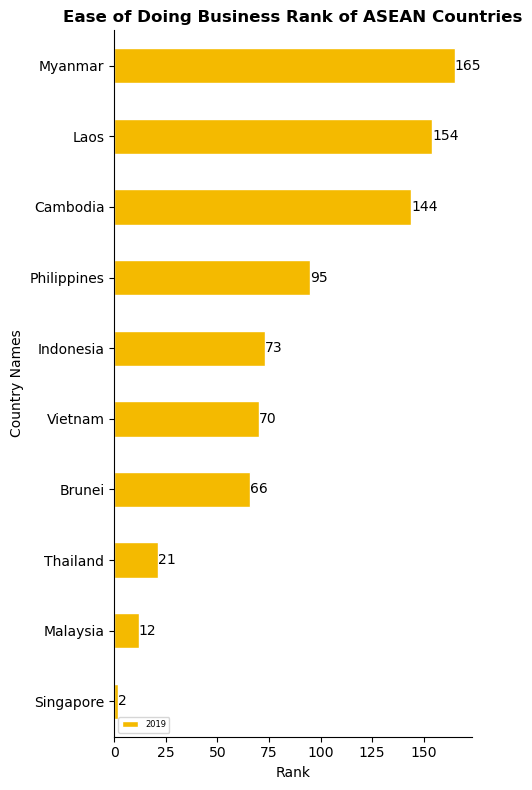

In [23]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(1,1,1)

ASEAN_ease.plot(y = '2019', fontsize=10, kind='barh', ax=ax, edgecolor='w', color = '#F4BA00')

ax.set_title('Ease of Doing Business Rank of ASEAN Countries', fontsize=12, fontweight ='bold')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Country Names', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend(fontsize=6)

for bars in ax.containers:
    ax.bar_label(bars)


plt.tight_layout()
#plt.savefig(fname = 'Images/Name')

In [24]:
ASEAN_ease.to_csv('cleaned-data/ASEAN_Ease_of_Doing_Business_cleaned.csv', index = True)

In [25]:
SouthAsia = ["Afghanistan", "Bangladesh","Bhutan","India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

In [26]:
SouthAsia_ease = ease_df.loc[SouthAsia].sort_values(by ='2019')

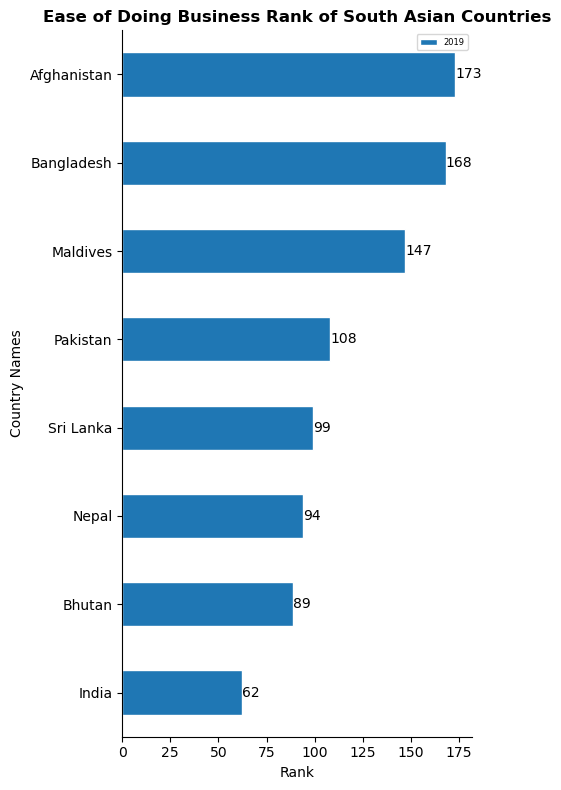

In [27]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(1,1,1)

SouthAsia_ease.plot(y = '2019', fontsize=10, kind='barh', ax=ax, edgecolor='w')

ax.set_title('Ease of Doing Business Rank of South Asian Countries', fontsize=12, fontweight ='bold')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Country Names', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend(fontsize=6)

for bars in ax.containers:
    ax.bar_label(bars)


plt.tight_layout()
#plt.savefig(fname = 'Images/Name')

In [28]:
SouthAsia_ease.to_csv('cleaned-data/SouthAsia_Ease_of_Doing_Business_cleaned.csv', index = True)

In [29]:
EastAsia = ["Hong Kong SAR, China", "Mongolia", "China", "Korea, Rep.", "Japan"] 
#no Taipei and Taiwan in Ease of Doing

In [30]:
EastAsia_ease = ease_df.loc[EastAsia].sort_values(by ='2019')

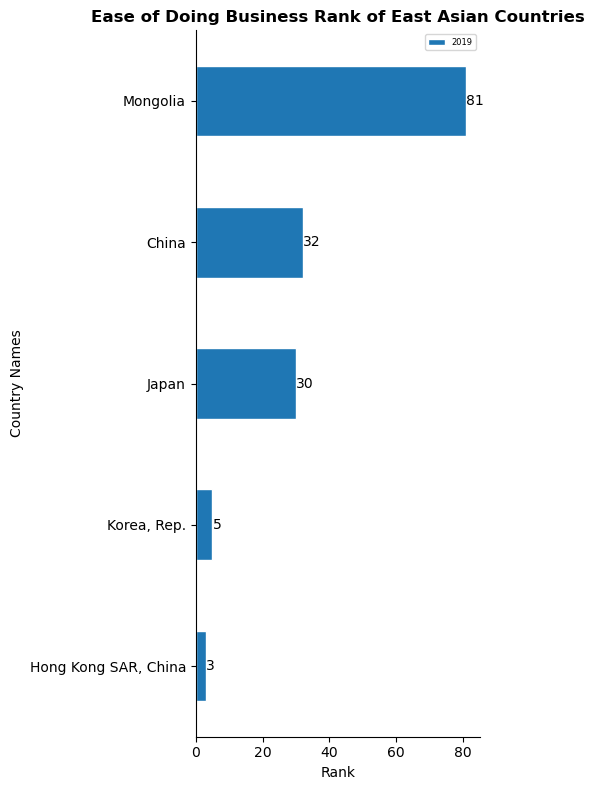

In [31]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(1,1,1)

EastAsia_ease.plot(y = '2019', fontsize=10, kind='barh', ax=ax, edgecolor='w')

ax.set_title('Ease of Doing Business Rank of East Asian Countries', fontsize=12, fontweight ='bold')
ax.set_xlabel('Rank', fontsize=10)
ax.set_ylabel('Country Names', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend(fontsize=6)

for bars in ax.containers:
    ax.bar_label(bars)


plt.tight_layout()
#plt.savefig(fname = 'Images/Name')

In [32]:
EastAsia_ease.to_csv('cleaned-data/EastAsia_Ease_of_Doing_Business_cleaned.csv', index = True)

In [33]:
unemp.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.512784,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219,7.916831
Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN
Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.804447,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,4.742175
Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,10.209000


In [34]:
unemp.isnull().sum().sum()

9246

In [35]:
unemp.dropna(axis=0, how='all', inplace = True) # 0 indicates the rows and inplace set to true modifies current dataframe

In [36]:
unemp.isnull().sum().sum()

9246

In [37]:
unemp.dropna(axis=1, how='all', inplace = True)

In [38]:
unemp.isnull().sum().sum()

1000

In [39]:
print(unemp['Country Code'].unique())

['ABW' 'AFE' 'AFG' 'AFW' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM'
 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS'
 'BIH' 'BLR' 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN'
 'CEB' 'CHE' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV'
 'CRI' 'CSS' 'CUB' 'CUW' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'EAP' 'EAR' 'EAS' 'ECA' 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST'
 'ETH' 'EUU' 'FCS' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA'
 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC'
 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN' 'IBD' 'IBT' 'IDA' 'IDB' 'IDN' 'IDX'
 'IMN' 'IND' 'INX' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN'
 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LDC' 'LIC' 'LIE' 'LKA' 'LMC' 'LMY' 'LSO' 'LTE' 'LTU'
 'LUX' 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL'
 'MIC' 'MKD' 'MLI' 'MLT' 'MMR' 'MNA' 'MNE' 'MNG' 'M

In [40]:
#unemp["Country Name"] = unemp["Country Name"].replace(['Brunei Darussalam', 'Lao PDR'], ['Brunei', 'Laos'])
unemp.rename(index={'Brunei Darussalam':'Brunei','Lao PDR' : 'Laos' },inplace=True)

In [41]:
ASEAN_unemp = unemp.loc[ASEANCountries]
ASEAN_unemp.head()

,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Brunei,BRN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.700,4.824,4.863,5.004,5.125,5.202,5.234,...,6.770,6.860,7.693,8.432,9.32,8.700,6.920,7.410,7.446,7.203
Cambodia,KHM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,0.749,0.768,0.813,1.380,0.785,0.840,0.913,...,0.440,0.690,0.390,0.720,0.14,0.142,0.146,0.298,0.295,0.361
Indonesia,IDN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.620,2.730,2.780,4.370,4.597,4.860,4.680,...,4.340,4.050,4.510,4.300,3.78,4.390,3.590,4.250,3.830,3.554
Laos,LAO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.611,2.576,2.590,2.506,2.600,2.485,2.367,...,1.775,2.146,2.521,2.896,3.27,3.266,3.273,3.576,3.637,2.633
Malaysia,MYS,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.660,3.710,4.110,3.655,3.150,2.520,2.450,...,3.160,2.880,3.100,3.440,3.41,3.300,3.260,4.540,4.046,3.730


In [42]:
ASEAN_unemp.to_csv('cleaned-data/ASEAN_Unemployed_cleaned.csv', index = True)

In [43]:
ASEAN_Unemployed_5years = pd.read_csv('cleaned-data/ASEAN_Unemployed_cleaned.csv', usecols=['Country Name', '2018',
                                                                                            '2019', '2020','2021','2022'])

<AxesSubplot:xlabel='Country Name'>

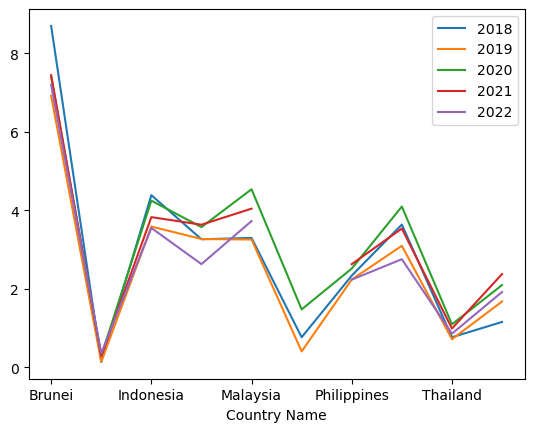

In [44]:
#ax = ASEAN_Unemployed_5years.plot.line(x='2018', '2019', '2020','2021','2022')
ASEAN_Unemployed_5years.plot('Country Name',['2018', '2019', '2020','2021','2022'],kind = 'line')

In [45]:
ASEAN_Unemployed_5years_transposed = ASEAN_Unemployed_5years.T
#test = ASEAN_Unemployed_5years_transposed.rename(columns={'Country Name': 'Year'},inplace=True)
#print(test)
#ASEAN_Unemployed_5years_transposed.rename(index={'Country Name': 'Year'}, columns={'0': 'Brunei', '1': 'Cambodia', '2' : 'Indonesia', '3':'Laos','4':'Malaysia','5' :'Mayanmar', '6':'Philippines', '7':'Singapore', '8':'Thailand', '9':'Vietnam'},inplace=True)
#ASEAN_Unemployed_5years_transposed.drop(index=ASEAN_Unemployed_5years_transposed.index[0], axis=0, inplace=True)
ASEAN_Unemployed_5years_transposed.columns = ASEAN_Unemployed_5years_transposed.iloc[0] # setting new index
ASEAN_Unemployed_5years_transposed_new = ASEAN_Unemployed_5years_transposed[1:] #creating a new dataframe by removing extra row
ASEAN_Unemployed_5years_transposed_new



Country Name,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
2018,8.7,0.142,4.39,3.266,3.3,0.77,2.34,3.641,0.77,1.16
2019,6.92,0.146,3.59,3.273,3.26,0.41,2.24,3.1,0.72,1.68
2020,7.41,0.298,4.25,3.576,4.54,1.48,2.52,4.1,1.1,2.1
2021,7.446,0.295,3.83,3.637,4.046,NaN,2.632,3.54,0.992,2.38
2022,7.203,0.361,3.554,2.633,3.73,NaN,2.238,2.758,0.862,1.923


In [46]:
ASEAN_Unemployed_5years_transposed_new.to_csv('cleaned-data/ASEAN_Unemployed_5years_cleaned_transposed.csv', index = True)

<AxesSubplot:title={'center':'Unemployment Rate by ASEAN Countries'}>

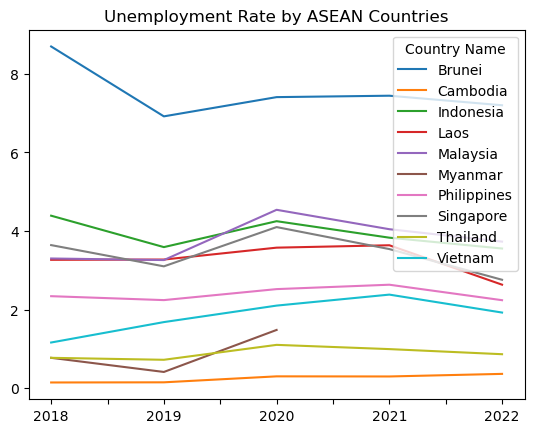

In [94]:
ASEAN_Unemployed_5years_transposed_new.plot(kind = 'line',  title='Unemployment Rate by ASEAN Countries')


In [48]:
SouthAsia_unemp = unemp.loc[SouthAsia]
SouthAsia_unemp.head()

,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.121,8.168,8.123,8.111,8.260,8.165,8.089,...,7.949,7.910,8.989,10.086,11.180,11.110,11.085,11.710,NaN,NaN
Bangladesh,BGD,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.200,2.295,2.339,2.381,2.464,2.510,2.694,...,4.430,4.393,4.371,4.350,4.370,4.380,4.382,5.209,5.097,4.699
Bhutan,BTN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.482,1.490,1.462,1.460,1.454,1.431,1.414,...,2.870,2.630,2.450,2.774,3.056,3.350,2.720,5.030,3.908,3.604
India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,6.737,6.815,6.798,6.830,7.014,7.181,7.279,...,8.037,7.981,7.915,7.842,7.733,7.650,6.510,10.195,7.713,7.330
Maldives,MDV,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,0.891,0.865,0.839,0.815,0.790,1.029,1.267,...,8.393,7.521,6.618,5.770,5.371,4.971,4.560,5.340,5.257,4.883


In [49]:
SouthAsia_unemp.to_csv('cleaned-data/SouthAsia_Unemployed_cleaned.csv', index = True)

In [50]:
EastAsia_unemp = unemp.loc[EastAsia]
EastAsia_unemp.head()

,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
"Hong Kong SAR, China",HKG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1.800,1.960,1.960,1.900,3.22,2.830,2.22,...,3.40,3.30,3.31,3.39,3.12,2.81,2.920,5.81,5.17,5.058
Mongolia,MNG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.933,5.937,5.764,5.617,5.50,5.692,5.74,...,4.23,4.80,4.86,7.24,6.36,5.38,5.443,6.59,7.75,8.247
China,CHN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.370,2.370,2.690,2.900,3.00,3.120,3.23,...,4.60,4.63,4.65,4.56,4.47,4.31,4.560,5.00,4.55,4.886
"Korea, Rep.",KOR,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.410,2.510,2.880,2.480,2.06,2.050,2.61,...,2.75,3.08,3.55,3.65,3.65,3.82,3.750,3.93,3.64,2.788
Japan,JPN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.100,2.200,2.500,2.900,3.20,3.400,3.40,...,4.04,3.59,3.39,3.13,2.82,2.47,2.350,2.80,2.80,2.641


In [51]:
EastAsia_unemp.to_csv('cleaned-data/EastAsia_Unemployed_cleaned.csv', index = True)

In [52]:
GDPgrowth.rename(columns={'Unnamed: 0':'Country Name' },inplace=True)
GDPgrowth = GDPgrowth.set_index('Country Name')
GDPgrowth.rename(index={'Brunei Darussalam':'Brunei','Lao People’s Dem. Rep.' : 'Laos', 'Viet Nam' : 'Vietnam' },inplace=True)
GDPgrowth.head()

,2018,2019,2020,2021,2022,2023,2024
Country Name,,,,,,,
Afghanistan,1.2,3.9,-2.4,-20.7,NaN,NaN,NaN
Bangladesh,7.3,7.9,3.4,6.9,7.1,5.3,6.5
Bhutan,3.1,5.8,-10.0,4.1,4.7,4.6,4.2
India,6.5,3.9,-5.8,9.1,6.8,6.4,6.7
Maldives,8.1,7.1,-33.5,41.7,12.3,7.1,6.9


In [53]:
GDPgrowth.isnull().sum().sum()

3

In [54]:
GDPgrowth.dropna(axis=0, how='all', inplace = True)

In [55]:
GDPgrowth.isnull().sum().sum()

3

In [56]:
GDPgrowth_ASEAN = GDPgrowth.loc[ASEANCountries]
GDPgrowth_SouthAsia = GDPgrowth.loc[SouthAsia]

In [57]:
EastAsia_noJ = ["Hong Kong SAR, China", "Mongolia", "China", "Korea, Rep."] 
#no Taipei and Taiwan in Ease of Doing
GDPgrowth_EastAsia = GDPgrowth.loc[EastAsia_noJ]

In [58]:
GDPgrowth_ASEAN.to_csv('cleaned-data/ASEAN_GDPgrowth_cleaned.csv', index = True)
GDPgrowth_SouthAsia.to_csv('cleaned-data/SouthAsia_GDPgrowth_cleaned.csv', index = True)
GDPgrowth_EastAsia.to_csv('cleaned-data/EastAsia_GDPgrowth_cleaned.csv', index = True)

<AxesSubplot:>

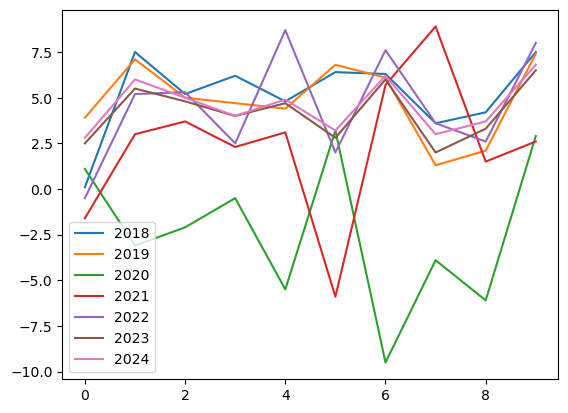

In [91]:
GDPgrowth_ASEAN_w2yearprojection = pd.read_csv('cleaned-data/ASEAN_GDPgrowth_cleaned.csv')
GDPgrowth_ASEAN_w2yearprojection.plot(kind = 'line')

In [60]:
GDPgrowth_ASEAN_w2yearprojection_transposed = GDPgrowth_ASEAN_w2yearprojection.T
GDPgrowth_ASEAN_w2yearprojection_transposed.columns = GDPgrowth_ASEAN_w2yearprojection_transposed.iloc[0] # setting new index
GDPgrowth_ASEAN_w2yearprojection_transposed_new = GDPgrowth_ASEAN_w2yearprojection_transposed[1:] #creating a new dataframe by removing extra row
GDPgrowth_ASEAN_w2yearprojection_transposed_new 

Country Name,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
2018,0.1,7.5,5.2,6.2,4.8,6.4,6.3,3.6,4.2,7.5
2019,3.9,7.1,5.0,4.7,4.4,6.8,6.1,1.3,2.1,7.4
2020,1.1,-3.1,-2.1,-0.5,-5.5,3.2,-9.5,-3.9,-6.1,2.9
2021,-1.6,3.0,3.7,2.3,3.1,-5.9,5.7,8.9,1.5,2.6
2022,-0.5,5.2,5.3,2.5,8.7,2.0,7.6,3.6,2.6,8.0
2023,2.5,5.5,4.8,4.0,4.7,2.8,6.0,2.0,3.3,6.5
2024,2.8,6.0,5.0,4.0,4.9,3.2,6.2,3.0,3.7,6.8


<AxesSubplot:title={'center':'Growth Rate of GDP by ASEAN Countries'}>

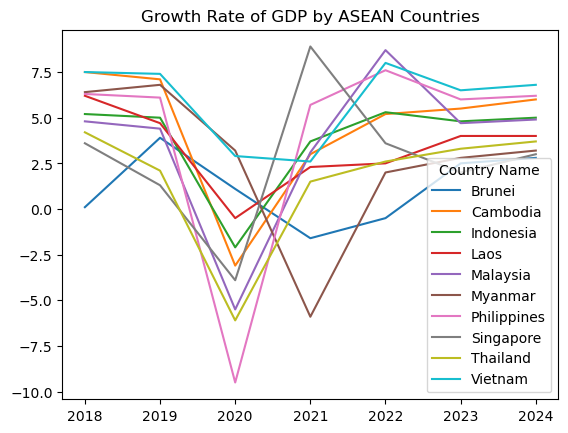

In [95]:
GDPgrowth_ASEAN_w2yearprojection_transposed_new.plot(kind = 'line', title='Growth Rate of GDP by ASEAN Countries')

In [62]:
GDPgrowth_SouthAsia_w2yearprojection = pd.read_csv('cleaned-data/SouthAsia_GDPgrowth_cleaned.csv')
GDPgrowth_SouthAsia_w2yearprojection_transposed = GDPgrowth_SouthAsia_w2yearprojection.T
GDPgrowth_SouthAsia_w2yearprojection_transposed.columns = GDPgrowth_SouthAsia_w2yearprojection_transposed.iloc[0] # setting new index
GDPgrowth_SouthAsia_w2yearprojection_transposed_new = GDPgrowth_SouthAsia_w2yearprojection_transposed[1:] #creating a new dataframe by removing extra row
GDPgrowth_SouthAsia_w2yearprojection_transposed_new 

Country Name,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
2018,1.2,7.3,3.1,6.5,8.1,7.6,6.1,2.3
2019,3.9,7.9,5.8,3.9,7.1,6.7,3.1,-0.2
2020,-2.4,3.4,-10.0,-5.8,-33.5,-2.4,-0.9,-4.6
2021,-20.7,6.9,4.1,9.1,41.7,4.2,5.7,3.5
2022,NaN,7.1,4.7,6.8,12.3,5.8,6.0,-7.8
2023,NaN,5.3,4.6,6.4,7.1,4.1,0.6,-3.0
2024,NaN,6.5,4.2,6.7,6.9,5.0,2.0,1.3


<AxesSubplot:title={'center':'Growth Rate of GDP by South Asian Countries'}>

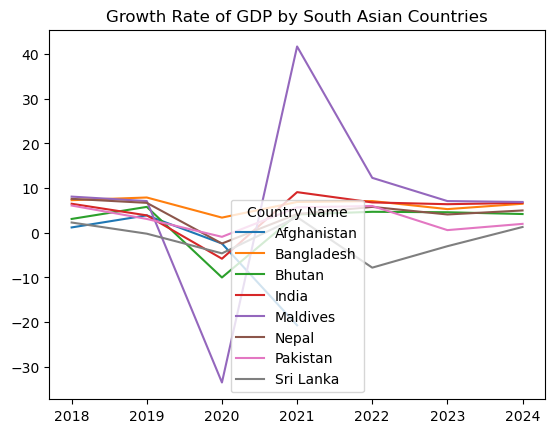

In [96]:
GDPgrowth_SouthAsia_w2yearprojection_transposed_new.plot(kind = 'line', title='Growth Rate of GDP by South Asian Countries')

In [64]:
HDI.rename(columns={'Unnamed: 0':'Country Name' },inplace=True)
HDI = HDI.set_index('Country Name')
HDI.head()

,2018 HDI value,2019 HDI value,2020 HDI value,2021 HDI value,Life expectancy at birth in years (2021),Expected years of schooling in years (2021),Mean years of schooling in years (2021),Gross national income (GNI) per capita (2021)
Country Name,,,,,,,,
Afghanistan,0.483,0.488,0.483,0.478,62.0,10.3,3.0,1824.0
Bangladesh,0.635,0.644,0.655,0.661,72.4,12.4,7.4,5472.0
Bhutan,0.658,0.671,0.668,0.666,71.8,13.2,5.2,9438.0
India,0.645,0.645,0.642,0.633,67.2,11.9,6.7,6590.0
Maldives,0.750,0.755,0.734,0.747,79.9,12.6,7.3,15448.0


In [65]:
HDI_ASEAN = HDI.loc[ASEANCountries]
HDI_SouthAsia = HDI.loc[SouthAsia]
HDI_EastAsia = HDI.loc[EastAsia]

In [66]:
HDI_ASEAN.to_csv('cleaned-data/ASEAN_HDI_cleaned.csv', index = True)
HDI_SouthAsia.to_csv('cleaned-data/SouthAsia_HDI_cleaned.csv', index = True)
HDI_EastAsia.to_csv('cleaned-data/EastAsia_HDI_cleaned.csv', index = True)

In [67]:
HDI_ASEAN_test = pd.read_csv('cleaned-data/ASEAN_HDI_cleaned.csv', usecols=['Country Name', '2018 HDI value',
'2019 HDI value', '2020 HDI value','2021 HDI value'])
HDI_ASEAN_test_transposed = HDI_ASEAN_test.T
HDI_ASEAN_test_transposed.columns = HDI_ASEAN_test_transposed.iloc[0] # setting new index
HDI_ASEAN_test_transposed_new = HDI_ASEAN_test_transposed[1:] #creating a new dataframe by removing extra row
HDI_ASEAN_test_transposed_new 

Country Name,Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
2018 HDI value,0.83,0.591,0.71,0.607,0.807,0.59,0.71,0.94,0.795,0.697
2019 HDI value,0.83,0.598,0.716,0.61,0.81,0.598,0.718,0.943,0.804,0.703
2020 HDI value,0.83,0.596,0.709,0.608,0.806,0.6,0.71,0.939,0.802,0.71
2021 HDI value,0.829,0.593,0.705,0.607,0.803,0.585,0.699,0.939,0.8,0.703


<AxesSubplot:title={'center':'Human Development Index by ASEAN Countries'}>

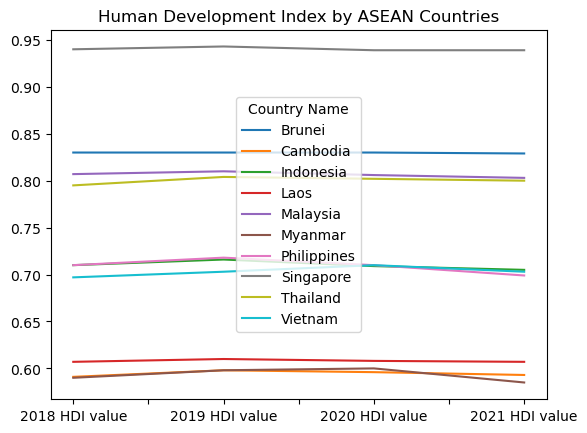

In [97]:
HDI_ASEAN_test_transposed_new.plot(kind = 'line', title='Human Development Index by ASEAN Countries')

In [69]:
HDI_SouthAsia_test = pd.read_csv('cleaned-data/SouthAsia_HDI_cleaned.csv', usecols=['Country Name', '2018 HDI value',
'2019 HDI value', '2020 HDI value','2021 HDI value'])
HDI_SouthAsia_test_transposed = HDI_SouthAsia_test.T
HDI_SouthAsia_test_transposed.columns =HDI_SouthAsia_test_transposed.iloc[0] # setting new index
HDI_SouthAsia_test_transposed_new = HDI_SouthAsia_test_transposed[1:] #creating a new dataframe by removing extra row
HDI_SouthAsia_test_transposed_new 

Country Name,Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka
2018 HDI value,0.483,0.635,0.658,0.645,0.75,0.601,0.545,0.776
2019 HDI value,0.488,0.644,0.671,0.645,0.755,0.611,0.546,0.778
2020 HDI value,0.483,0.655,0.668,0.642,0.734,0.604,0.543,0.78
2021 HDI value,0.478,0.661,0.666,0.633,0.747,0.602,0.544,0.782


<AxesSubplot:title={'center':'Human Development Index by South Asian Countries'}>

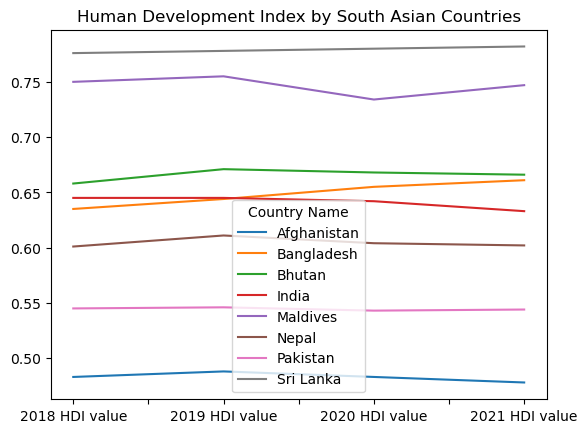

In [98]:
HDI_SouthAsia_test_transposed_new.plot(kind = 'line', title='Human Development Index by South Asian Countries')

In [71]:
HDI_EastAsia_test = pd.read_csv('cleaned-data/EastAsia_HDI_cleaned.csv', usecols=['Country Name', '2018 HDI value',
'2019 HDI value', '2020 HDI value','2021 HDI value'])
HDI_EastAsia_test_transposed = HDI_EastAsia_test.T
HDI_EastAsia_test_transposed.columns = HDI_EastAsia_test_transposed.iloc[0] # setting new index
HDI_EastAsia_test_transposed_new = HDI_EastAsia_test_transposed[1:] #creating a new dataframe by removing extra row
HDI_EastAsia_test_transposed_new 

Country Name,"Hong Kong SAR, China",Mongolia,China,"Korea, Rep.",Japan
2018 HDI value,0.949,0.743,0.755,0.919,0.923
2019 HDI value,0.952,0.746,0.762,0.923,0.924
2020 HDI value,0.949,0.745,0.764,0.922,0.923
2021 HDI value,0.952,0.739,0.768,0.925,0.925


<AxesSubplot:title={'center':'Human Development Index by East Asian Countries'}>

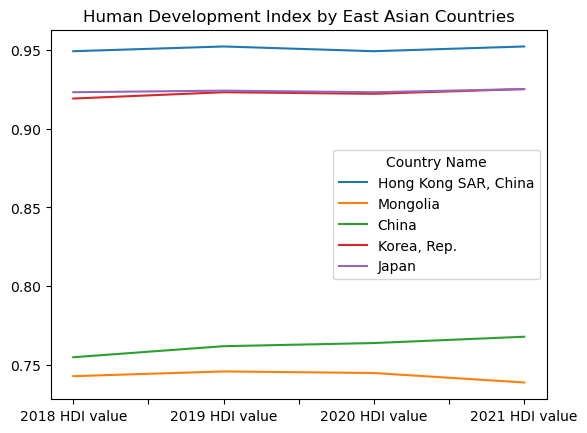

In [99]:
HDI_EastAsia_test_transposed_new .plot(kind = 'line', title='Human Development Index by East Asian Countries')

In [73]:
prod.head()

,Unnamed: 0,2016,2017,2018,2019
0,Bangladesh,4.113085,4.307637,4.591530,4.791032
1,India,7.609988,8.009788,8.536673,8.680879
2,Pakistan,7.953004,8.322207,8.668698,8.772413
3,Sri Lanka,17.275410,17.048510,17.891240,18.019520
4,Cambodia,2.828313,3.022650,3.263742,3.433210


In [74]:
prod.isnull().sum().sum()

0

In [75]:
prod.rename(columns={'Unnamed: 0':'Country Name' },inplace=True)
prod = prod.set_index('Country Name')

In [76]:
noBnL = ["Cambodia", "Indonesia", "Malaysia", "Myanmar", "Philippines", 
                  "Singapore", "Thailand", "Vietnam"] #no Brunei and Laos

In [77]:
prod_ASEAN = prod.loc[noBnL] #no Brunei and Laos
prod_ASEAN

,2016,2017,2018,2019
Country Name,,,,
Cambodia,2.828313,3.022650,3.263742,3.433210
Indonesia,11.205150,11.354790,11.730030,11.843270
Malaysia,23.226150,23.654080,24.144670,24.754380
Myanmar,4.711011,4.735484,4.774512,5.147914
Philippines,8.849580,9.450450,9.835632,9.929681
Singapore,49.459690,54.298780,55.625140,54.552580
Thailand,13.135730,14.745840,14.859360,15.167230
Vietnam,5.156925,5.652919,5.982665,6.739149


In [78]:
noABMN = ["Bangladesh","India", "Pakistan", "Sri Lanka"] 
#no ['Afghanistan', 'Bhutan', 'Maldives', 'Nepal']

In [79]:
prod_SouthAsia = prod.loc[noABMN]
prod_SouthAsia

,2016,2017,2018,2019
Country Name,,,,
Bangladesh,4.113085,4.307637,4.591530,4.791032
India,7.609988,8.009788,8.536673,8.680879
Pakistan,7.953004,8.322207,8.668698,8.772413
Sri Lanka,17.275410,17.048510,17.891240,18.019520


In [80]:
noMong = ["Hong Kong SAR, China", "China", "Korea, Rep.", "Japan"] 

In [81]:
prod_EastAsia = prod.loc[noMong]

In [82]:
prod_ASEAN.to_csv('cleaned-data/ASEAN_prod_cleaned.csv', index = True)
prod_SouthAsia.to_csv('cleaned-data/SouthAsia_prod_cleaned.csv', index = True)
prod_EastAsia.to_csv('cleaned-data/EastAsia_prod_cleaned.csv', index = True)

In [83]:
prod_ASEAN_test = pd.read_csv('cleaned-data/ASEAN_prod_cleaned.csv')
prod_ASEAN_test_transposed = prod_ASEAN_test.T
prod_ASEAN_test_transposed.columns =prod_ASEAN_test_transposed.iloc[0] # setting new index
prod_ASEAN_test_transposed_new = prod_ASEAN_test_transposed[1:] #creating a new dataframe by removing extra row
prod_ASEAN_test_transposed_new 

Country Name,Cambodia,Indonesia,Malaysia,Myanmar,Philippines,Singapore,Thailand,Vietnam
2016,2.828313,11.20515,23.22615,4.711011,8.84958,49.45969,13.13573,5.156925
2017,3.02265,11.35479,23.65408,4.735484,9.45045,54.29878,14.74584,5.652919
2018,3.263742,11.73003,24.14467,4.774512,9.835632,55.62514,14.85936,5.982665
2019,3.43321,11.84327,24.75438,5.147914,9.929681,54.55258,15.16723,6.739149


<AxesSubplot:title={'center':'Productivity (average economic output per hour worked) by ASEAN Countries'}>

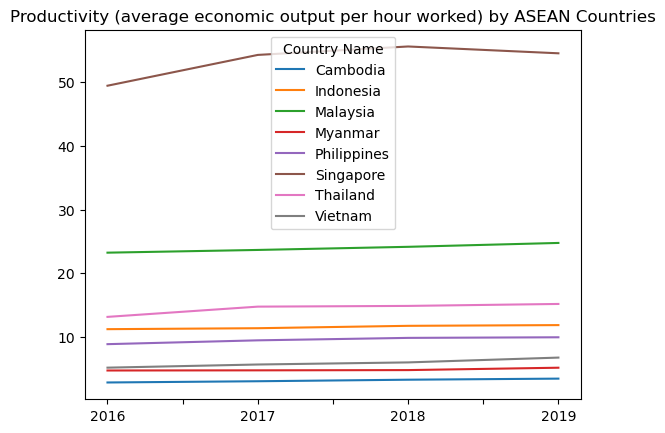

In [100]:
prod_ASEAN_test_transposed_new.plot(kind = 'line', title='Productivity (average economic output per hour worked) by ASEAN Countries')

In [85]:
prod_SouthAsia_test = pd.read_csv('cleaned-data/SouthAsia_prod_cleaned.csv')
prod_SouthAsia_test_transposed = prod_SouthAsia_test.T
prod_SouthAsia_test_transposed.columns =prod_SouthAsia_test_transposed.iloc[0] # setting new index
prod_SouthAsia_test_transposed_new = prod_SouthAsia_test_transposed[1:] #creating a new dataframe by removing extra row
prod_SouthAsia_test_transposed_new 

Country Name,Bangladesh,India,Pakistan,Sri Lanka
2016,4.113085,7.609988,7.953004,17.27541
2017,4.307637,8.009788,8.322207,17.04851
2018,4.59153,8.536673,8.668698,17.89124
2019,4.791032,8.680879,8.772413,18.01952


<AxesSubplot:title={'center':'Productivity (average economic output per hour worked) by South Asian Countries'}>

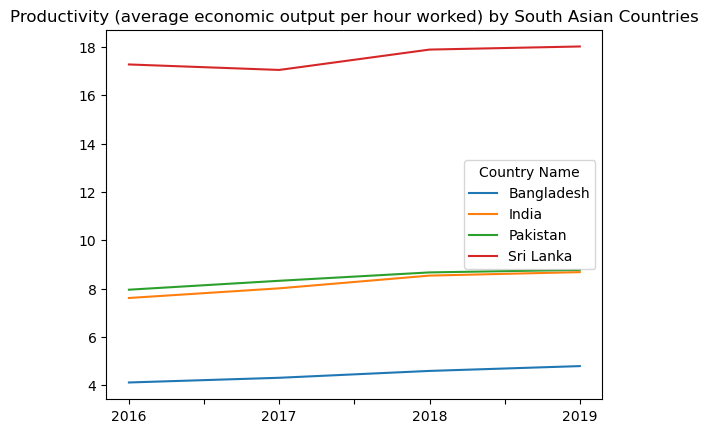

In [101]:
prod_SouthAsia_test_transposed_new.plot(kind = 'line', title = 'Productivity (average economic output per hour worked) by South Asian Countries')

In [87]:
prod_EastAsia_test = pd.read_csv('cleaned-data/EastAsia_prod_cleaned.csv')
prod_EastAsia_test_transposed = prod_EastAsia_test.T
prod_EastAsia_test_transposed.columns =prod_EastAsia_test_transposed.iloc[0] # setting new index
prod_EastAsia_test_transposed_new = prod_EastAsia_test_transposed[1:] #creating a new dataframe by removing extra row
prod_EastAsia_test_transposed_new 

Country Name,"Hong Kong SAR, China",China,"Korea, Rep.",Japan
2016,44.55309,10.742945,36.87733,42.68171
2017,44.372982,11.357738,39.083927,42.422935
2018,49.2496,11.380233,40.092373,41.73783
2019,49.118412,11.692401,40.768528,42.56412


<AxesSubplot:title={'center':'Productivity (average economic output per hour worked) by East Asian Countries'}>

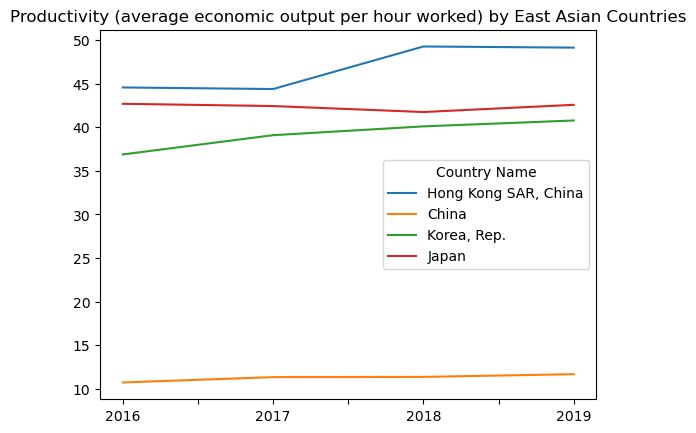

In [102]:
prod_EastAsia_test_transposed_new.plot(kind = 'line', title = 'Productivity (average economic output per hour worked) by East Asian Countries')

In [89]:
#print(ease.info(), unemp.info(), GDPgrowth.info(), HDI.info(), prod.info())